In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

# Reads excel file into dataframe
cell_df = pd.read_excel("extra_data_example.xlsx")

Text(0.5, 1.0, 'Cell Viability of Different Materials')

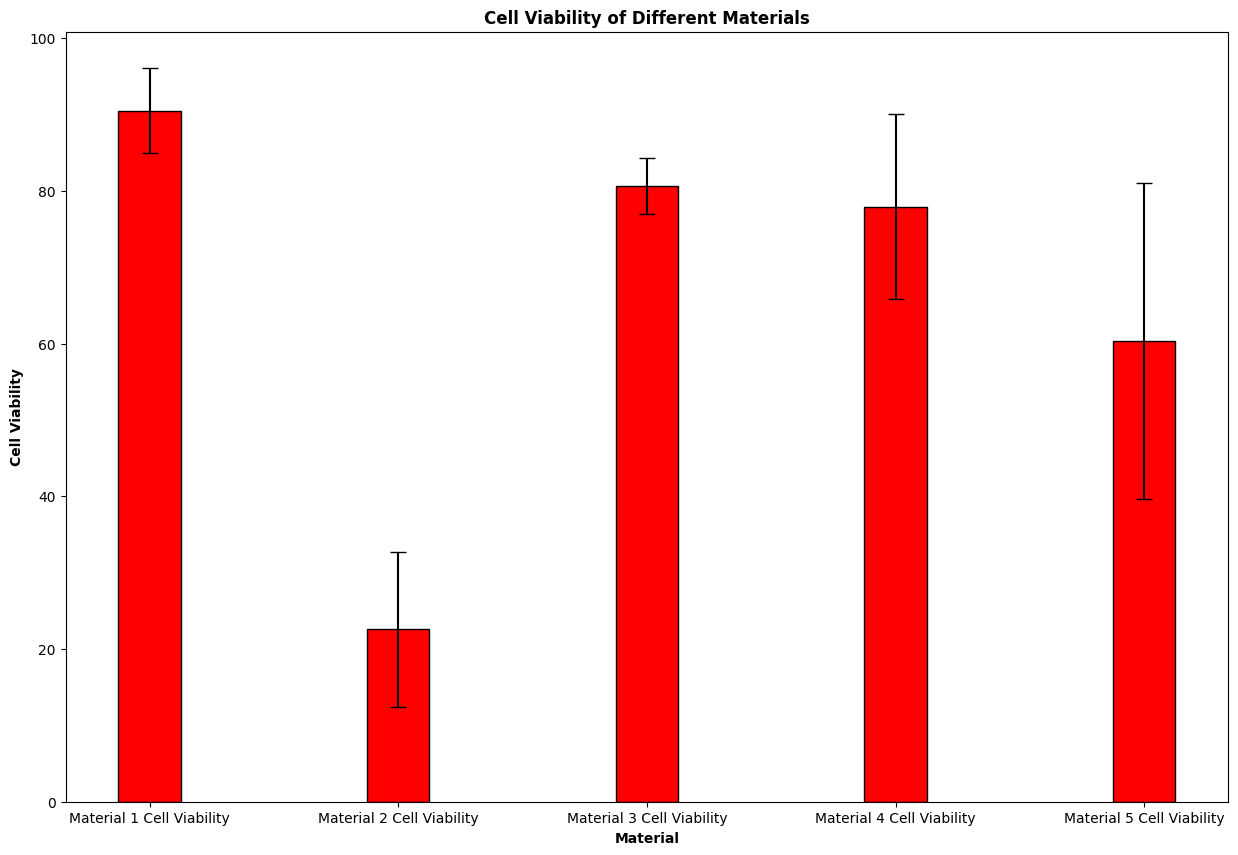

In [12]:
# Bar plot of cell viability
plt.figure (figsize=(15,10))
plt.bar(cell_df.columns, cell_df.mean(), yerr = cell_df.std(), width = 0.25, color = 'red', ec = 'black', capsize = 6)
plt.xlabel('Material', weight = 'bold')
plt.ylabel('Cell Viability', weight = 'bold')
plt.title('Cell Viability of Different Materials', weight = 'bold')

Shapiro Tests:

Material 1 Result: ShapiroResult(statistic=np.float64(0.9450613047923301), pvalue=np.float64(0.29826235582609695))
Material 2 Result: ShapiroResult(statistic=np.float64(0.9464559687917486), pvalue=np.float64(0.3164733559444973))
Material 3 Result: ShapiroResult(statistic=np.float64(0.9737578703192492), pvalue=np.float64(0.8313773586100368))
Material 4 Result: ShapiroResult(statistic=np.float64(0.9525846495518314), pvalue=np.float64(0.4080345151758666))
Material 5 Result: ShapiroResult(statistic=np.float64(0.9525846495518314), pvalue=np.float64(0.4080345151758666))


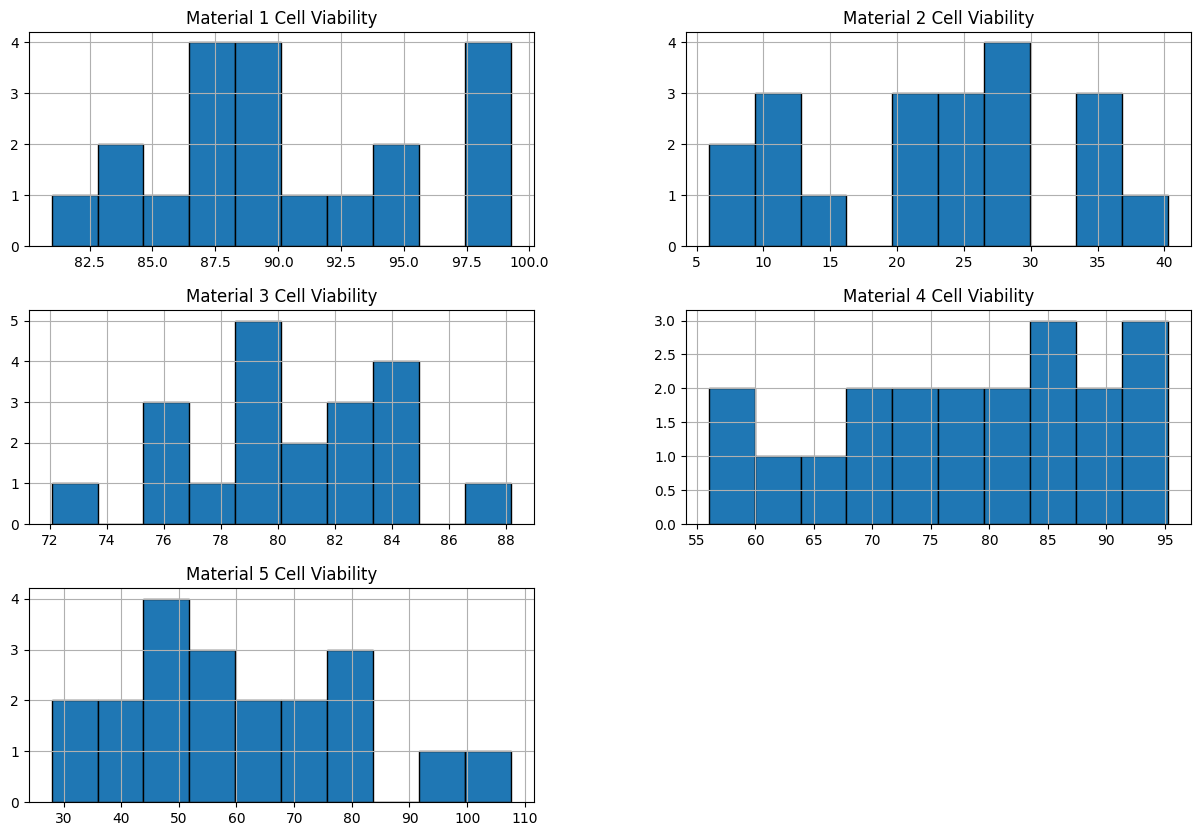

In [13]:
# Test of normality, materials are independent of one another, small sample size and unpaired data so should use mann-whitney test/maybe shapiro test as that is what was performed for CSC data in previous lab with fewer samples
cell_df.hist(figsize = (15,10), ec = 'black')   # plots a histogram of all the data in cell viability, can use because only relevant data included in the sheet

# If p-value < than 0.05 data is likely not normally distributed
print('Shapiro Tests:\n')   # Prints 'Shapiro Test:' and then moves to newline to print shapiro test for each data set
print('Material 1 Result:',stats.shapiro(cell_df['Material 1 Cell Viability'])) # To do shapiro test, need to print out results, then use stats module from scipy and apply to each column in turn
print('Material 2 Result:',stats.shapiro(cell_df['Material 2 Cell Viability']))
print('Material 3 Result:',stats.shapiro(cell_df['Material 3 Cell Viability']))
print('Material 4 Result:',stats.shapiro(cell_df['Material 4 Cell Viability']))
print('Material 5 Result:',stats.shapiro(cell_df['Material 4 Cell Viability']))

Data appears to be normally distributed - this means we can do ANOVA (worth noting that apparently you can only do ANOVA on normally distributed data)

In [ ]:
# Oneway ANOVA which produces a statistic and p-value, am I to assume statistical difference if p-value < 0.001 (I believe this is the measure for significant difference from null hypothesis)
# f_oneway takes all columns of data as input arguments

stats.f_oneway(cell_df['Material 1 Cell Viability'], cell_df['Material 2 Cell Viability'], cell_df['Material 3 Cell Viability'], cell_df['Material 4 Cell Viability'], cell_df['Material 5 Cell Viability'])

F_onewayResult(statistic=np.float64(99.65745910469758), pvalue=np.float64(3.984222520241889e-33))

In [ ]:
# Because there is a significant difference we must do a post-hoc correction to find where this is
# Use Bonferroni correction as it is the most conservative, data is indpendent so we use an independent t-test (is this correct?)

print('Corrected alpha: ', 0.05/5) # prints a value of corrected alpha where alpha value is divided by number of comparisons

# How do we decide which comparisons to do?
print('Material 1 to 2', stats.ttest_ind(cell_df['Material 1 Cell Viability'], cell_df['Material 2 Cell Viability']))   # ttest_ind requires two input arguments (the two columns of data being compared)
print('Material 1 to 3', stats.ttest_ind(cell_df['Material 1 Cell Viability'], cell_df['Material 3 Cell Viability']))
print('Material 2 to 3', stats.ttest_ind(cell_df['Material 2 Cell Viability'], cell_df['Material 3 Cell Viability']))
print('Material 3 to 4', stats.ttest_ind(cell_df['Material 3 Cell Viability'], cell_df['Material 4 Cell Viability']))
print('Material 4 to 5', stats.ttest_ind(cell_df['Material 4 Cell Viability'], cell_df['Material 5 Cell Viability']))

Corrected alpha:  0.01
Material 1 to 2 TtestResult(statistic=np.float64(26.209820598493412), pvalue=np.float64(6.169727574794117e-26), df=np.float64(38.0))
Material 1 to 3 TtestResult(statistic=np.float64(6.636166622718816), pvalue=np.float64(7.671528313775e-08), df=np.float64(38.0))
Material 2 to 3 TtestResult(statistic=np.float64(-23.972973296740903), pvalue=np.float64(1.5153456046637023e-24), df=np.float64(38.0))
Material 3 to 4 TtestResult(statistic=np.float64(0.9523016229748836), pvalue=np.float64(0.3469624698766268), df=np.float64(38.0))
Material 4 to 5 TtestResult(statistic=np.float64(3.2935192260949697), pvalue=np.float64(0.0021461133452807717), df=np.float64(38.0))


So all are statistically different except for material 3 to 4 (reject all null hypothesis except 3 to 4)

NOT SURE WHAT TO SAY ABOUT IMPROVING STUDY DESIGN